In [46]:
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx

from castle.datasets import DAG, IIDSimulation
from castle.metrics import MetricsDAG
from castle.algorithms import Notears

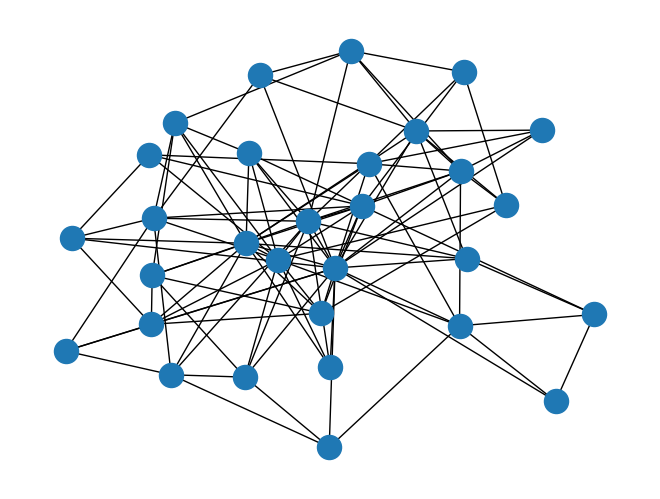

In [47]:
W_true =DAG.scale_free(n_nodes=30, n_edges=120)
G = nx.from_numpy_array(W_true)
nx.draw(G)

2024-07-24 17:10:00,023 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.12/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset
2024-07-24 17:10:00,024 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.12/site-packages/castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=1000, d=30, iter_=100, h_=1e-08, rho_=1e+16
2024-07-24 17:10:00,407 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.12/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=7.644e-01, loss=90301.130, rho=1.0e+00
2024-07-24 17:10:00,638 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.12/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=5.658e-01, loss=16.796, rho=1.0e+00
2024-07-24 17:10:00,794 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.12/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INF

<Axes: xlabel='Value', ylabel='Frequency'>

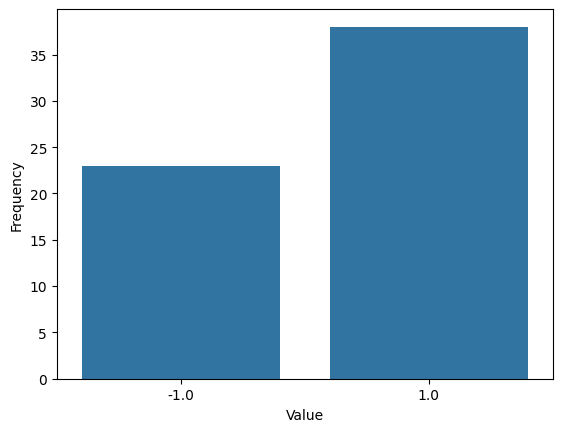

In [48]:
N_learn_samples = 1000
method = "linear"
sem_type = "gauss"
noise_scale = 1

model = Notears()

data = IIDSimulation(
    W=W_true,
    n=N_learn_samples,
    method=method,
    sem_type=sem_type,
    noise_scale=noise_scale,
)

model.learn(data.X)

sns.barplot(x='Value', y='Frequency', data=pd.DataFrame(np.unique((W_true - model.causal_matrix).flatten(), return_counts=True)).T.rename(columns={0: 'Value', 1: 'Frequency'}).query('Value in [1, -1]'))

In [49]:
results = np.load('../NoTears_results.npy')

In [50]:
np.abs(results).mean(axis=1).mean(axis=1)

array([0.136, 0.137, 0.136, 0.136, 0.136, 0.136, 0.136, 0.137, 0.136,
       0.138])